<a href="https://colab.research.google.com/github/PurvishParekh/FCC_Linear_Regression_Health_Cost_Calculator/blob/main/Linear_Regression_Health_Cost_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-07-05 14:09:46--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.4’

insurance.csv.4     100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2024-07-05 14:09:46 (32.8 MB/s) - ‘insurance.csv.4’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
dataset = dataset.join(pd.get_dummies(dataset.region, prefix='region').astype(int)).drop('region', axis=1)

In [ ]:
dataset.tail()

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
1333,50,1,31.0,3,0,10600.55,0,1,0,0
1334,18,0,31.9,0,0,2205.98,1,0,0,0
1335,18,0,36.9,0,0,1629.83,0,0,1,0
1336,21,0,25.8,0,0,2007.95,0,0,0,1
1337,61,0,29.1,0,1,29141.36,0,1,0,0


In [ ]:


labels = {}

values = dataset.sex.astype('category')
labels['sex'] = values.cat.categories
dataset['sex'] = values.cat.codes

values = dataset.smoker.astype('category')
labels['smoker'] = values.cat.categories
dataset['smoker'] = values.cat.codes

In [ ]:
dataset.tail()

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
1333,50,1,31.0,3,0,10600.55,0,1,0,0
1334,18,0,31.9,0,0,2205.98,1,0,0,0
1335,18,0,36.9,0,0,1629.83,0,0,1,0
1336,21,0,25.8,0,0,2007.95,0,0,0,1
1337,61,0,29.1,0,1,29141.36,0,1,0,0


In [ ]:
ratio = 0.8
total_rows = dataset.shape[0]
train_size = int(total_rows*ratio)

train_dataset = dataset[:train_size]
test_dataset = dataset[train_size:]

train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

model = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(units=1)
])

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
    loss='mse',
    metrics = ['mae', 'mse']
)

history = model.fit(
    train_dataset,
    train_labels,
    epochs = 100
)


Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 174792208.0000 - mae: 9798.6406 - mse: 174792208.0000
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 120033720.0000 - mae: 8479.6016 - mse: 120033720.0000
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 97254400.0000 - mae: 7699.6201 - mse: 97254400.0000
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 54531780.0000 - mae: 5416.3604 - mse: 54531780.0000
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 43546944.0000 - mae: 4609.2930 - mse: 43546944.0000
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 43633952.0000 - mae: 4562.7461 - mse: 43633952.0000
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 36680684.0000 - mae: 3996.6799 - mse: 36680684.0000
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 38821120.0000 - mae: 4163.1982 - mse: 38821120.0

9/9 - 0s - loss: 26014606.0000 - mae: 3298.8242 - mse: 26014606.0000 - 230ms/epoch - 26ms/step
Testing set Mean Abs Error: 3298.82 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 3ms/step


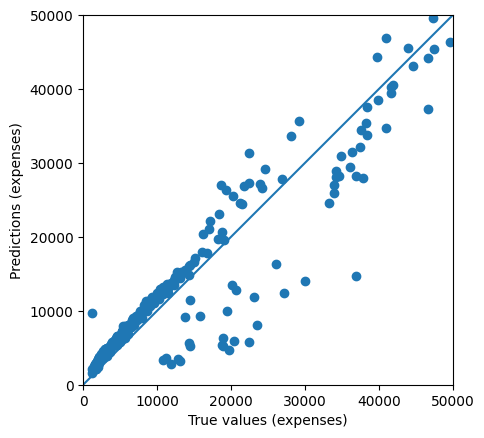

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
